In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.special import comb

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import log_loss, make_scorer
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.datasets import load_breast_cancer, load_iris

In [4]:
cd src

/Users/liliying/Galvanize/instagram_fake_followers_detector/src


In [51]:
data = pd.read_csv('../data_cleaned.csv')

In [52]:
data = data.rename({'Unnamed: 0':'follower_id'}, axis = 'columns').iloc[:,:-1]

In [54]:
mean_er = data['engagement_rate'][data['engagement_rate'] !=0].mean()

In [55]:
data['engagement_rate'][data['engagement_rate'] == 0] = mean_er

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [57]:
data

,follower_id,user_name,full_name,num_posts,num_followers,num_followings,is_private,is_business,is_joined_recently,biography,num_followers_float,following_follower_ratio,engagement_rate
0,0,wqwqwq12345w,1998,0.0,1,12.0,0,0,1,åÁNi recentid@ ni dolid@ acÌÁ te la bancas_ÙÕ£...,1.0,6.000000,0.073413
1,1,soymuyfalsa,soy muy falsa,5.0,62,1.0,0,0,0,0,62.0,0.015873,0.073413
2,2,andrea_bordon_,andrea bordon,1.0,132,78.0,0,1,0,25/08/1999Monfalcone-Udine Italy_Ùà¨_Ùà_,132.0,0.586466,0.073413
3,3,@ndah.endah.3701,@ndah.endah.3701 _ã¢ Instagram photos and videos,3.0,798,138.0,0,1,0,Haters make me famous_Ù÷È,798.0,0.172716,0.073413
4,4,jolsuperstar_tz,jolsuperstartz,66.0,494,195.0,0,0,0,_ÙÓ¡FANSHII NDIO SPECIAL ACCOUNT YANGU KARIBUN...,494.0,0.393939,0.073413
5,5,wisnuhdyat33,WisnuHidayat,5.0,552,252.0,0,1,0,PERSIB BANDUNG___Ù÷üBogor Indonesia_Ùà¨_Ùà©,552.0,0.455696,0.073413
6,6,adiukulelo87,________ _____ä_____µ__Î__µ__ª,27.0,9438,6989.0,0,0,0,£À _Óà_ÓÂ_ÓÇ_Ó± _Ó±_Ó¢_Ó©_Ó© _Ó__Ó¢...,9438.0,0.740439,0.032500
7,7,edupdv04,Eduard Puigdevall,303.0,1705,434.0,0,1,0,Subcamp.Cat. SQ '06CampeÌ_n Cat. SQ '07Subcamp...,1705.0,0.254396,0.073000
8,8,segaid98,Sega ID98,17.0,274,210.0,0,0,0,Senggol bacok.Pribadi yang lebih baik _Ùª,274.0,0.763636,0.073413
9,9,reza.aliakber,Reza Aliakbar,2.0,75,168.0,0,0,0,0,75.0,2.210526,0.073413


In [19]:
urls = ['http://instagram.com/' + username for username in list(data['user_name'])]

In [23]:
from urllib.request import urlopen as uReq
import json
import time
import random
import bs4
import requests
from bs4 import BeautifulSoup
from selenium.webdriver import Chrome, Firefox
from pymongo import MongoClient

In [30]:
browser = Chrome()

In [112]:
X = data.iloc[:, [3,5,6,8,10,11,12]]

In [115]:
y = data.iloc[:,7]

In [116]:
X.shape

(198, 7)

In [117]:
y.shape

(198,)

### train-test split

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

In [122]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((148, 7), (50, 7), (148,), (50,))

### logistic regression

In [220]:
model = LogisticRegression()

In [221]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148 entries, 84 to 122
Data columns (total 7 columns):
num_posts                   148 non-null float64
num_followings              148 non-null float64
is_private                  148 non-null int64
 is_joined_recently         148 non-null int64
num_followers_float         148 non-null float64
following_follower_ratio    148 non-null float64
engagement_rate             148 non-null float64
dtypes: float64(5), int64(2)
memory usage: 9.2 KB


In [222]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [226]:
y_pred = model.predict_proba(X_test)[:,1]

In [227]:
y_pred

array([6.95043683e-01, 4.50998687e-01, 4.37105976e-01, 5.49553122e-01,
       4.64984865e-01, 1.87606244e-04, 3.55087687e-09, 1.75830187e-01,
       6.05786575e-06, 2.20966433e-03, 4.64590687e-01, 2.98354883e-01,
       2.83940409e-03, 1.42892954e-01, 9.93122860e-01, 3.31667351e-01,
       3.35627161e-04, 5.77098516e-01, 5.82163638e-10, 1.14937796e-01,
       3.76650252e-01, 4.38251819e-05, 7.84502177e-01, 8.93977907e-02,
       8.64410448e-01, 2.61059308e-02, 9.99305145e-01, 5.66291466e-01,
       1.41728480e-01, 3.05057215e-04, 1.76968293e-01, 4.63244828e-01,
       2.58688289e-01, 4.35445937e-01, 3.36418429e-02, 2.39115151e-01,
       2.54853027e-01, 4.15208807e-05, 8.15075107e-03, 3.19581190e-04,
       4.81455740e-01, 2.81999894e-03, 8.24988643e-06, 1.62372447e-02,
       4.68683062e-01, 1.48524166e-01, 5.07492379e-01, 9.88042108e-01,
       7.13334548e-01, 5.19377115e-01])

In [228]:
y_test_pred = pd.DataFrame({'actual':y_test,'prediction':y_pred})

y_test_pred[y_test_pred['actual']== 0]

,actual,prediction
144,0,4.509987e-01
34,0,4.371060e-01
1,0,4.649849e-01
69,0,1.876062e-04
154,0,3.550877e-09
130,0,1.758302e-01
48,0,6.057866e-06
184,0,2.209664e-03
188,0,4.645907e-01
101,0,2.839404e-03


In [135]:
log_loss1 = log_loss(y_test, y_pred)

In [136]:
log_loss1

0.6382397253825103

In [137]:
cv_logloss = -cross_val_score(model, X, y, scoring = 'neg_log_loss', cv = 10).mean()
cv_logloss

0.428574214234286

### random forest

In [195]:
rf = RandomForestClassifier(n_estimators=100,
                            n_jobs=-1,
                            random_state=1)

In [196]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [197]:
y_pred = rf.predict_proba(X_test)[:, 1]
y_pred

array([0.63      , 0.35      , 0.36      , 0.68      , 0.355     ,
       0.0475    , 0.        , 0.17      , 0.        , 0.01      ,
       0.44      , 0.35      , 0.        , 0.42      , 0.59      ,
       0.38      , 0.        , 0.51      , 0.        , 0.43166667,
       0.68      , 0.0375    , 0.59      , 0.11      , 0.5       ,
       0.        , 0.39      , 0.57      , 0.16      , 0.        ,
       0.08      , 0.59      , 0.2       , 0.41      , 0.06      ,
       0.01      , 0.35      , 0.        , 0.02      , 0.01      ,
       0.43      , 0.01      , 0.        , 0.        , 0.83      ,
       0.07      , 0.55      , 0.34      , 0.45      , 0.46      ])

In [198]:
y_test_pred = pd.DataFrame({'actual':y_test,'prediction':y_pred})

y_test_pred[y_test_pred['actual']== 0]

,actual,prediction
144,0,0.3500
34,0,0.3600
1,0,0.3550
69,0,0.0475
154,0,0.0000
130,0,0.1700
48,0,0.0000
184,0,0.0100
188,0,0.4400
101,0,0.0000


In [191]:
cv_logloss_rf1 = -cross_val_score(rf, X, y, cv = 10, scoring = 'neg_log_loss').mean()

In [192]:
cv_logloss_rf1

0.45090151970301334

### Best random forest

In [150]:
random_forest_grid = {'max_depth': [3, 4, None],
                      'max_features': ['sqrt', 'log2', None],
                      'min_samples_split': [2, 4],
                      'min_samples_leaf': [1, 2, 4],
                      'bootstrap': [True, False],
                      'n_estimators': [40, 80, 100, 120, 140, 160],
                      'random_state': [359]}

rf_gridsearch = GridSearchCV(RandomForestClassifier(),
                             random_forest_grid,
                             n_jobs=-1,
                             verbose=True,
                             scoring='neg_log_loss')
rf_gridsearch.fit(X_train, y_train)

print("best parameters:", rf_gridsearch.best_params_)

best_rf_model = rf_gridsearch.best_estimator_

Fitting 3 folds for each of 648 candidates, totalling 1944 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   44.0s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1944 out of 1944 | elapsed:  3.2min finished


best parameters: {'bootstrap': True, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 120, 'random_state': 359}


In [151]:
best_rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=120, n_jobs=1,
            oob_score=False, random_state=359, verbose=0, warm_start=False)

In [152]:
y_pred_best = best_rf_model.predict_proba(X_test)[:, 1]


In [153]:
y_pred_best

array([2.02305505e-01, 2.03105473e-01, 9.72075813e-03, 3.81748144e-01,
       1.76200295e-01, 2.80340593e-04, 4.45490111e-03, 4.78732840e-01,
       1.74955570e-03, 4.26456447e-03, 1.99983370e-01, 6.05400830e-01,
       1.74955570e-03, 4.74553501e-01, 1.20592195e-01, 4.40819093e-01,
       9.47007260e-04, 1.05792999e-01, 4.45490111e-03, 6.27562815e-04,
       1.25662549e-02, 5.91016548e-05, 2.72959925e-01, 7.73009617e-03,
       2.85839583e-01, 4.45490111e-03, 1.21562518e-01, 4.89084748e-01,
       4.08917582e-02, 1.74955570e-03, 6.57894939e-03, 5.18200627e-02,
       1.48137857e-02, 8.17754825e-03, 4.45490111e-03, 2.52653215e-03,
       1.10463105e-02, 1.74955570e-03, 2.52653215e-03, 3.67396805e-03,
       9.72075813e-03, 2.97495488e-03, 1.74955570e-03, 4.25648841e-03,
       1.46795860e-02, 3.05827818e-03, 4.30748266e-02, 1.41696409e-01,
       1.57733469e-01, 1.47294319e-01])

In [154]:
cv_logloss_rf2 = -cross_val_score(best_rf_model, X, y, cv = 10, scoring = 'neg_log_loss').mean()

In [155]:
cv_logloss_rf2

0.18086879122580168

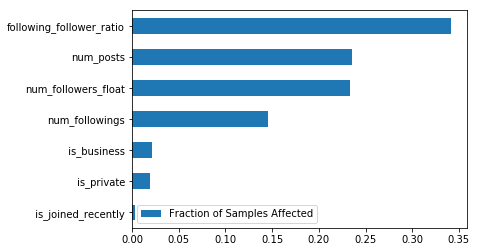

In [50]:
feat_scores = pd.DataFrame({'Fraction of Samples Affected' : rf.feature_importances_},
                           index=X.columns)
feat_scores = feat_scores.sort_values(by='Fraction of Samples Affected')
feat_scores.plot(kind='barh')

### predict proba given a username

In [51]:
pwd

'/Users/liliying/Galvanize/instagram_fake_followers_detector/src'

In [52]:
cd src

[Errno 2] No such file or directory: 'src'
/Users/liliying/Galvanize/instagram_fake_followers_detector/src


In [53]:
from get_new_feature import get_new_features

In [54]:
from DataPreparation import get_info

In [55]:
url = 'https://www.instagram.com/lilylii818/'

In [56]:
get_info(url)

('lilylii818', 'Liying (Lily) Li ', '90', '128', '116')

In [57]:
get_new_features(url)

(True, False, False, 'Decision making.')

In [ ]:
def put_into_df(username):
    one_user = []
    for item in get_info(url):
        one_user.append(item)
    for feature in get_new_features(url):
        one_user.append(feature)
    one_user_df = pd.DataFrame(np.array(one_user).reshape(1,-1))
    one_user_df['num_followers_float'] = one_user_df.apply(lambda row: float(row[3].replace('k', 'e3').replace('m', 'e6')), axis=1)
    one_user_df['following_follower_ratio'] = float(one_user_df[4]) / (float(one_user_df['num_followers_float']) +1)
    

In [58]:
one_user = []

In [59]:
for item in get_info(url):
    one_user.append(item)
for feature in get_new_features(url):
    one_user.append(feature)

In [60]:
one_user_df = pd.DataFrame(np.array(one_user).reshape(1,-1))

In [61]:
one_user_df['num_followers_float'] = one_user_df.apply(lambda row: float(row[3].replace('k', 'e3').replace('m', 'e6')), axis=1)

In [62]:
one_user_df

,0,1,2,3,4,5,6,7,8,num_followers_float
0,lilylii818,Liying (Lily) Li,90,128,116,True,False,False,Decision making.,128.0


In [64]:
one_user_df['following_follower_ratio'] = float(one_user_df[4]) / (float(one_user_df['num_followers_float']) +1)


In [65]:
one_user_df = one_user_df.drop(8, axis = 1)

In [66]:
one_user_df

,0,1,2,3,4,5,6,7,num_followers_float,following_follower_ratio
0,lilylii818,Liying (Lily) Li,90,128,116,True,False,False,128.0,0.899225


In [67]:
one_user_df.iloc[:,5]

0    True
Name: 5, dtype: object

In [68]:
#data_no_nan.iloc[:,6] = data_no_nan.iloc[:,6].astype(int)
one_user_df.iloc[0,5] = [1 if one_user_df.iloc[0,5] == 'True' else 0]
one_user_df.iloc[0,6] = [1 if one_user_df.iloc[0,6] == 'True' else 0]
one_user_df.iloc[0,7] = [1 if one_user_df.iloc[0,7] == 'True' else 0]

In [69]:
one_user_df.iloc[:,[2,4,5,6,7,8,9]]

,2,4,5,6,7,num_followers_float,following_follower_ratio
0,90,116,1,0,0,128.0,0.899225


In [70]:
one_user_pred_proba = best_rf_model.predict_proba(one_user_df.iloc[:,[2,4,5,6,7,8,9]])[:,1][0]

In [71]:
one_user_pred_proba

0.0731802981749361

In [85]:
follower_urls = ['https://www.instagram.com/realbanderson/',
 'https://www.instagram.com/pomonyshop/',
 'https://www.instagram.com/llaarrddll/',
 'https://www.instagram.com/phachraa.aamaatmntrii/',
 'https://www.instagram.com/charoenrak/',
 'https://www.instagram.com/klaus_estamparia/',
 'https://www.instagram.com/ploymingg/',
 'https://www.instagram.com/lock__co/',
 'https://www.instagram.com/lynaround_lyn.shop/',
 'https://www.instagram.com/diarylovely_shop/',
 'https://www.instagram.com/suphattra_stp/',
 'https://www.instagram.com/alldy_horre_oficall/',
 'https://www.instagram.com/250grownowbypla/',
 'https://www.instagram.com/lopesluxo/',
 'https://www.instagram.com/nichapa__42/',
 'https://www.instagram.com/_tuktuck_/',
 'https://www.instagram.com/sevetcompany/',
 'https://www.instagram.com/nutsara_kae/',
 'https://www.instagram.com/ephiiyngephyrungeruueng/',
 'https://www.instagram.com/b2g.imports/',
 'https://www.instagram.com/nunaraliz/',
 'https://www.instagram.com/areeratsuthinon/',
 'https://www.instagram.com/lojadoralph_oficial/',
 'https://www.instagram.com/jubjubjaaa/',
 'https://www.instagram.com/rukyim_arpeeraya/',
 'https://www.instagram.com/styleschicchic/',
 'https://www.instagram.com/jamilrobinson_/',
 'https://www.instagram.com/japanshop.14/',
 'https://www.instagram.com/porpar.takom/',
 'https://www.instagram.com/hardcoreirk/',
 'https://www.instagram.com/einooh/',
 'https://www.instagram.com/elegancebastos/',
 'https://www.instagram.com/eflatunnakliyat/',
 'https://www.instagram.com/gianemodapb/',
 'https://www.instagram.com/r8multimarcas_/',
 'https://www.instagram.com/aomji_sp/',
 'https://www.instagram.com/yamada_105th/',
 'https://www.instagram.com/tonaor_aory/',
 'https://www.instagram.com/250grownowbypare/',
 'https://www.instagram.com/bbussabong_ph/',
 'https://www.instagram.com/nookzaa.zaa/',
 'https://www.instagram.com/disney_dolls_/',
 'https://www.instagram.com/succhitraakhamphrayaa/',
 'https://www.instagram.com/madamesofia_pop/',
 'https://www.instagram.com/akropolbg_sales/',
 'https://www.instagram.com/meebyme11_shoe2/',
 'https://www.instagram.com/ya_gromova/',
 'https://www.instagram.com/herclothes90/',
 'https://www.instagram.com/oil.2hand/',
 'https://www.instagram.com/takipcibegeni.kazan/',
 'https://www.instagram.com/pai.doodee/',
 'https://www.instagram.com/yok_kuki/',
 'https://www.instagram.com/waniewaniex/',
 'https://www.instagram.com/qeenieeeee/',
 'https://www.instagram.com/lady.oat/',
 'https://www.instagram.com/suwiml7673/',
 'https://www.instagram.com/nichapa9898/',
 'https://www.instagram.com/prapai1985/',
 'https://www.instagram.com/ruckcana/',
 'https://www.instagram.com/poywinnercar/',
 'https://www.instagram.com/wansai_crazybrand_shop/',
 'https://www.instagram.com/manish__lohar/',
 'https://www.instagram.com/kanokpornpukpik/',
 'https://www.instagram.com/beam_wijitpan/',
 'https://www.instagram.com/sunisa.aom2/',
 'https://www.instagram.com/ebijungofficial/',
 'https://www.instagram.com/numtarn_numtarn/',
 'https://www.instagram.com/minnie_sri/',
 'https://www.instagram.com/suree_milk/',
 'https://www.instagram.com/richardr.vega/',
 'https://www.instagram.com/mookkkkk__2421/',
 'https://www.instagram.com/second_handclothesshop/',
 'https://www.instagram.com/rattanasasi/',
 'https://www.instagram.com/natini699/',
 'https://www.instagram.com/rththang_k14/',
 'https://www.instagram.com/newcoolsocial/',
 'https://www.instagram.com/windythefatcat/',
 'https://www.instagram.com/8me.natty/',
 'https://www.instagram.com/pockiya.421/',
 'https://www.instagram.com/aki_oly8899/',
 'https://www.instagram.com/janenista18/',
 'https://www.instagram.com/kru_nampuengthai/',
 'https://www.instagram.com/princess.botox/',
 'https://www.instagram.com/oilyjazz/',
 'https://www.instagram.com/fayrider_ii/',
 'https://www.instagram.com/piyaratsiri/',
 'https://www.instagram.com/phatwarin_j/',
 'https://www.instagram.com/ns_pohntanit/',
 'https://www.instagram.com/savitripoonsawat/',
 'https://www.instagram.com/nitta_brandname/',
 'https://www.instagram.com/pokhaphanish/',
 'https://www.instagram.com/inspireyour/',
 'https://www.instagram.com/kimber11mm/',
 'https://www.instagram.com/wawa_zeza/',
 'https://www.instagram.com/memorytou/',
 'https://www.instagram.com/piachida/']

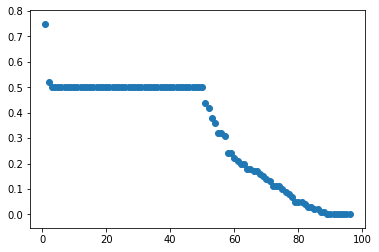

In [132]:
plt.scatter(np.linspace(1,len(follower_urls), len(follower_urls)), sorted(proba_list, reverse=True))

In [138]:
url = follower_urls[1]

In [139]:
url

'https://www.instagram.com/pomonyshop/'

In [67]:
from src.DataPreparation import *

In [68]:
followers_df = get_all_info(url)

In [69]:
followers_df

,user_name,full_name,num_posts,num_followers,num_following,is_private,is_business,is_joined_recently,biography
0,pomonyshop,Pom Surattanawadee,481,705,1632,False,False,False,New & Used \n🛍 Brandname Authentic 💯\n💙 สินค้า...


In [153]:
from DataPreparation import fc

In [154]:
fc.count_documents({})

439

In [63]:
username = 'pomonyshop'

In [64]:
url = f'https://www.instagram.com/{username}'

In [65]:
url

'https://www.instagram.com/pomonyshop'

In [70]:
def get_follower_data(followers_df):
    return followers_df.to_dict(orient = 'records')
    
    

In [150]:
get_follower_data(data)

[{'follower_id': 0,
  'user_name': 'wqwqwq12345w',
  'full_name': '1998',
  'num_posts': 0.0,
  'num_followers': '1',
  'num_followings': 12.0,
  'is_private': 0,
  ' is_business': 0,
  ' is_joined_recently': 1,
  ' biography': 'åÁNi recentid@ ni dolid@ acÌÁ te la bancas_ÙÕ£!Y si no me acuerdo no paso_ÙÕÉ_Ù___Ù_¦@soymuyfalsa',
  'num_followers_float': 1.0,
  'following_follower_ratio': 6.0,
  'engagement_rate': 0.0},
 {'follower_id': 1,
  'user_name': 'soymuyfalsa',
  'full_name': 'soy muy falsa',
  'num_posts': 5.0,
  'num_followers': '62',
  'num_followings': 1.0,
  'is_private': 0,
  ' is_business': 0,
  ' is_joined_recently': 0,
  ' biography': '0',
  'num_followers_float': 62.0,
  'following_follower_ratio': 0.015873015873015872,
  'engagement_rate': 0.0},
 {'follower_id': 2,
  'user_name': 'andrea_bordon_',
  'full_name': 'andrea bordon',
  'num_posts': 1.0,
  'num_followers': '132',
  'num_followings': 78.0,
  'is_private': 0,
  ' is_business': 1,
  ' is_joined_recently': 0,
  '

In [145]:
for follower_data in get_follower_data(data):
    username = follower_data['user_name']
    url = f'https://www.instagram.com/{username}'
    follower_data['url'] = url
    fc.update_one({'url': url}, {'$set': follower_data}, True)

In [146]:
pd.DataFrame(list(fc.find()))

,biography,is_business,is_joined_recently,_id,biography,engagement_rate,follower_id,following_follower_ratio,full_name,is_business,is_joined_recently,is_private,num_followers,num_followers_float,num_following,num_followings,num_posts,url,user_name
0,NaN,NaN,NaN,5bfc88f3baead13dc62256a4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.instagram.com/soymuyfalsa/,NaN
1,NaN,NaN,NaN,5bfc88f3baead13dc62256a5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.instagram.com/lirlando/,NaN
2,NaN,NaN,NaN,5bfc88f3baead13dc62256a6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.instagram.com/andrea_bordon_/,NaN
3,NaN,NaN,NaN,5bfc88f3baead13dc62256a7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.instagram.com/ndah.endah.3701/,NaN
4,NaN,NaN,NaN,5bfc88f3baead13dc62256a8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.instagram.com/jolsuperstar_tz/,NaN
5,NaN,NaN,NaN,5bfc88f3baead13dc62256a9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.instagram.com/wisnuhdyat33/,NaN
6,NaN,NaN,NaN,5bfc88f3baead13dc62256aa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.instagram.com/adiukulelo87/,NaN
7,NaN,NaN,NaN,5bfc88f3baead13dc62256ab,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.instagram.com/edupdv04/,NaN
8,NaN,NaN,NaN,5bfc88f3baead13dc62256ac,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.instagram.com/segaid98/,NaN
9,NaN,NaN,NaN,5bfc88f3baead13dc62256ad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.instagram.com/reza.aliakber/,NaN


### ROC 

In [164]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [167]:
y_pred

array([0.63      , 0.35      , 0.36      , 0.68      , 0.355     ,
       0.0475    , 0.        , 0.17      , 0.        , 0.01      ,
       0.44      , 0.35      , 0.        , 0.42      , 0.59      ,
       0.38      , 0.        , 0.51      , 0.        , 0.43166667,
       0.68      , 0.0375    , 0.59      , 0.11      , 0.5       ,
       0.        , 0.39      , 0.57      , 0.16      , 0.        ,
       0.08      , 0.59      , 0.2       , 0.41      , 0.06      ,
       0.01      , 0.35      , 0.        , 0.02      , 0.01      ,
       0.43      , 0.01      , 0.        , 0.        , 0.83      ,
       0.07      , 0.55      , 0.34      , 0.45      , 0.46      ])

In [168]:
roc_auc_score(y_test, y_pred)

0.7927631578947368

In [170]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

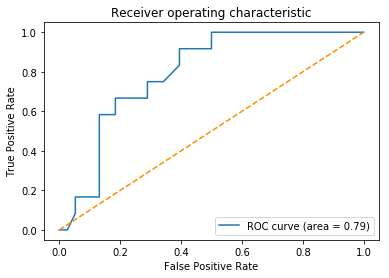

In [171]:
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_pred))
plt.plot([0, 1], [0, 1], color='darkorange', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")